# FOUNDATION LEARNING SKILLS

## Load libraries

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical
from iteration_utilities import deepflatten

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data collection

### Foundational-learning_2021-1.xlsx

In [3]:
xl_file = pd.ExcelFile('Foundational-learning_2021-1.xlsx')

In [4]:
df = xl_file.parse('Foundational learning', header=[0, 1])

for i in range(0,7):
    df.rename({df.columns[i][1]:""}, axis="columns", inplace=True)
    
df.drop(df.index[100:], inplace=True)

In [5]:
df

Countries and areas Region Sub-region Development regions  \
                                                                     
0                 Bangladesh     SA         SA     Least Developed   
1                 Bangladesh     SA         SA     Least Developed   
2                 Bangladesh     SA         SA     Least Developed   
3                 Bangladesh     SA         SA     Least Developed   
4   Central African Republic    SSA        WCA     Least Developed   
..                       ...    ...        ...                 ...   
95              Turkmenistan    ECA       EECA      Less Developed   
96                  Zimbabwe    SSA        ESA      Less Developed   
97                  Zimbabwe    SSA        ESA      Less Developed   
98                  Zimbabwe    SSA        ESA      Less Developed   
99                  Zimbabwe    SSA        ESA      Less Developed   

      Age group   Subject      Total        Sex             Residence  \
                                          Girls       Boys      Rural   
0   Age 7 to 14   Reading  48.814716  52.392544  45.074005  46.981983   
1   Age 7 to 14  Numeracy  27.866051  28.959688  26.722622  26.574785   
2     Grade 2/3   Reading  24.599609  26.002825  23.178070  21.751852   
3     Grade 2/3  Numeracy  12.550222  12.392838  12.709662  11.408230   
4   Age 7 to 14   Reading   4.693856   4.560828   4.809788   2.057838   
..          ...       ...        ...        ...        ...        ...   
95    Grade 2/3  Numeracy  53.200000  64.800000  58.500000        NaN   
96  Age 7 to 14   Reading  44.365719  48.368660  40.518608  36.768028   
97  Age 7 to 14  Numeracy  24.620714  26.782095  22.543474  19.146442   
98    Grade 2/3   Reading  19.576178  21.219332  17.992134  12.351241   
99    Grade 2/3  Numeracy   5.108691   4.419424   5.773163   2.455187   

              Wealth quintile                                              \
        Urban         Poorest     Second     Middle     Fourth    Richest   
0   55.805260       35.360210  43.906765  50.639637  54.517452  63.611889   
1   32.791283       19.557022  25.148443  27.337364  31.040785  38.721001   
2   35.798244       16.602999  18.201494  22.767086  28.660402  42.274563   
3   17.041044        8.673656  10.437841  11.085612  12.559054  22.395241   
4    9.213395        0.486284   3.040068   1.691019   4.024787  13.331376   
..        ...             ...        ...        ...        ...        ...   
95        NaN             NaN        NaN        NaN        NaN        NaN   
96  67.629013       25.323767  34.230465  44.128292  56.616516  76.777069   
97  41.382336       12.622963  21.344015  20.532696  31.470972  47.066925   
98  41.673153        6.278276  10.377341  16.939035  27.667347  50.681393   
99  13.224252        0.395979   2.538109   2.018403   8.800878  17.066843   

     Data             
   Source       Year  
0   MICS6       2019  
1   MICS6       2019  
2   MICS6       2019  
3   MICS6       2019  
4   MICS6  2018-2019  
..    ...        ...  
95  MICS6       2019  
96  MICS6       2019  
97  MICS6       2019  
98  MICS6       2019  
99  MICS6       2019  

[100 rows x 18 columns]

**Combine the column header**

In [6]:
col = []
for i in range(len(df.columns)):
    if i < 7:
        col.append(df.columns[i][0])
    else:
        col.append(df.columns[i][0] + '-' + df.columns[i][1])

In [7]:
df.columns = col
df

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Turkmenistan,ECA,EECA,Less Developed,Grade 2/3,Numeracy,53.200000,64.800000,58.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICS6,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,MICS6,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,MICS6,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,MICS6,2019


In [8]:
df.dtypes

Countries and areas         object
Region                      object
Sub-region                  object
Development regions         object
Age group                   object
Subject                     object
Total                      float64
Sex-Girls                  float64
Sex-Boys                   float64
Residence-Rural            float64
Residence-Urban            float64
Wealth quintile-Poorest    float64
Wealth quintile-Second     float64
Wealth quintile-Middle     float64
Wealth quintile-Fourth     float64
Wealth quintile-Richest    float64
Data-Source                 object
Data-Year                   object
dtype: object

In [9]:
df.describe()

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
count,100.000000,100.000000,100.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,26.198632,27.131777,25.470714,22.350986,29.768563,17.371929,21.387640,24.266147,28.115457,37.684759
std,21.036023,22.361859,20.346177,21.112209,21.387091,19.048739,20.722063,22.238528,22.135513,23.564574
min,0.394631,0.051010,0.473044,0.022533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.432622,7.059242,7.625648,4.550694,12.301420,2.479506,3.636985,4.610935,8.740612,17.095623
50%,21.480844,21.059666,20.877780,13.027112,24.972675,8.001463,12.608856,16.606810,24.916075,37.256182
75%,43.923937,45.792249,38.673675,36.599011,44.219891,27.821079,33.977889,42.645542,44.460066,58.154563
max,81.800000,84.400000,82.000000,83.400000,79.000000,76.100000,89.800000,78.600000,79.900000,84.800000


## Data Cleaning

### Step 1: Handling missing data

**Are there any missing values?**

In [10]:
df.isnull().sum() * 100 / len(df)

Countries and areas        0.0
Region                     0.0
Sub-region                 0.0
Development regions        0.0
Age group                  0.0
Subject                    0.0
Total                      0.0
Sex-Girls                  0.0
Sex-Boys                   0.0
Residence-Rural            6.0
Residence-Urban            6.0
Wealth quintile-Poorest    6.0
Wealth quintile-Second     6.0
Wealth quintile-Middle     6.0
Wealth quintile-Fourth     6.0
Wealth quintile-Richest    6.0
Data-Source                0.0
Data-Year                  0.0
dtype: float64

In [11]:
df.isnull().sum()

Countries and areas        0
Region                     0
Sub-region                 0
Development regions        0
Age group                  0
Subject                    0
Total                      0
Sex-Girls                  0
Sex-Boys                   0
Residence-Rural            6
Residence-Urban            6
Wealth quintile-Poorest    6
Wealth quintile-Second     6
Wealth quintile-Middle     6
Wealth quintile-Fourth     6
Wealth quintile-Richest    6
Data-Source                0
Data-Year                  0
dtype: int64

In [12]:
df.shape

(100, 18)

In [13]:
null_rows = df.isnull()  # this does not work. Append .any(axis=1) to make it work
null_rows  # boolean indexing

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


`isnull()` applied on the whole dataframe does not produce the intended behaviour. This function needs to be applied to check for *any* NaN values along the column side (*axis=1*).

**Any data that can be cleaned or transformed?**

In [14]:
df.head(7)

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019
5,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Numeracy,1.527805,1.202405,1.811385,0.870304,2.655113,0.150043,0.833223,1.646962,1.321195,3.428246,MICS6,2018-2019
6,Central African Republic,SSA,WCA,Least Developed,Grade 2/3,Reading,1.775748,1.798235,1.758916,1.379215,2.422417,0.000000,2.188316,1.472594,1.221289,3.482309,MICS6,2018-2019


### Step 2: Remove the irrelevant observations

**Drop the data with missing data 'NaN'**

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019


In [17]:
df.shape

(94, 18)

**Drop the unnecessary data column**

In [18]:
df = df.drop(('Data-Source'), axis=1)

In [19]:
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019


## Describing the Data

In [20]:
df.dtypes

Countries and areas         object
Region                      object
Sub-region                  object
Development regions         object
Age group                   object
Subject                     object
Total                      float64
Sex-Girls                  float64
Sex-Boys                   float64
Residence-Rural            float64
Residence-Urban            float64
Wealth quintile-Poorest    float64
Wealth quintile-Second     float64
Wealth quintile-Middle     float64
Wealth quintile-Fourth     float64
Wealth quintile-Richest    float64
Data-Year                   object
dtype: object

In [21]:
df.describe()

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,25.024077,25.861465,24.228419,22.350986,29.768563,17.371929,21.387640,24.266147,28.115457,37.684759
std,20.770505,21.860690,20.015429,21.112209,21.387091,19.048739,20.722063,22.238528,22.135513,23.564574
min,0.394631,0.051010,0.473044,0.022533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.234411,6.782024,7.440390,4.550694,12.301420,2.479506,3.636985,4.610935,8.740612,17.095623
50%,19.756634,19.898628,20.007759,13.027112,24.972675,8.001463,12.608856,16.606810,24.916075,37.256182
75%,39.055473,41.669121,37.287081,36.599011,44.219891,27.821079,33.977889,42.645542,44.460066,58.154563
max,81.800000,84.400000,82.000000,83.400000,79.000000,76.100000,89.800000,78.600000,79.900000,84.800000


**Is the data entered by a human?**

In [22]:
df['Age group'].unique()

array(['Age 7 to 14', 'Grade 2/3'], dtype=object)

In [23]:
df['Development regions'].unique()

array(['Least Developed', 'Less Developed', 'More Developed'],
      dtype=object)

In [24]:
df['Subject'].unique()

array(['Reading', 'Numeracy'], dtype=object)

### Box Plot

In [25]:
df_total = df[['Total']]
df_total

,Total
0,48.814716
1,27.866051
2,24.599609
3,12.550222
4,4.693856
...,...
93,70.000000
96,44.365719
97,24.620714
98,19.576178


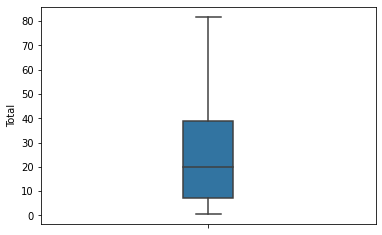

In [26]:
sns.boxplot(y='Total', width=0.15, data=df_total).figure.savefig('Total_Bosplot.png')

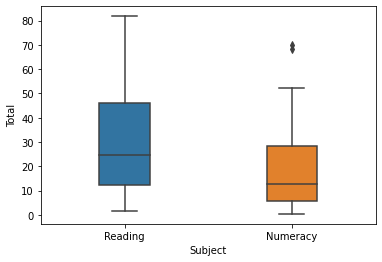

In [27]:
sns.boxplot(x='Subject', y='Total', width=0.3, data=df).figure.savefig('Total_vs_Subject.png')

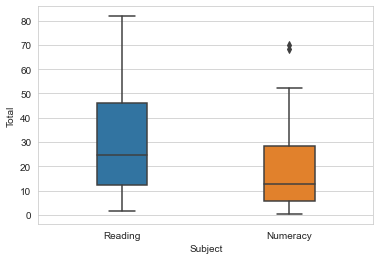

In [28]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=df).figure.savefig('Total_vs_Subject_withgrid.png')

## Additional Dataset

### Literacy-rate_2021-1.xlsx

In [29]:
xl_file = pd.ExcelFile('Literacy-rate_2021-1.xlsx')

literacy = xl_file.parse('Youth literacy rate, aged 15-24', header=[0, 1])
    
literacy

ISO3        Countries and areas             Region  \
    Unnamed: 0_level_1         Unnamed: 1_level_1 Unnamed: 2_level_1   
0                  AFG                Afghanistan                 SA   
1                  ALB                    Albania                ECA   
2                  DZA                    Algeria               MENA   
3                  AND                    Andorra                ECA   
4                  AGO                     Angola                SSA   
..                 ...                        ...                ...   
214                NaN                 South Asia                 SA   
215                NaN         Sub-Saharan Africa                SSA   
216                NaN  Eastern & Southern Africa                NaN   
217                NaN      West & Central Africa                NaN   
218                NaN                      World                NaN   

             Sub-region Development Regions              Total     Gender  \
    UNICEF Sub-region 1  Unnamed: 4_level_1 Unnamed: 5_level_1     Female   
0                    SA     Least Developed          65.420547  56.254749   
1                  EECA      More Developed          99.330002  99.629997   
2                  MENA      Less Developed          97.426521  97.252159   
3                    WE      More Developed                NaN        NaN   
4                   ESA     Least Developed                NaN        NaN   
..                  ...                 ...                ...        ...   
214                 NaN            89.95697                NaN        NaN   
215                 NaN           76.328102                NaN        NaN   
216                 ESA           79.924637                NaN        NaN   
217                 WCA           72.341187                NaN        NaN   
218                 NaN           91.725731                NaN        NaN   

                    Source              
          Male Data source Time period  
0    74.084801         UIS      2018.0  
1    99.050003         UIS      2018.0  
2    97.594063         UIS      2018.0  
3          NaN         NaN         NaN  
4          NaN         NaN         NaN  
..         ...         ...         ...  
214        NaN         NaN         NaN  
215        NaN         NaN         NaN  
216        NaN         NaN         NaN  
217        NaN         NaN         NaN  
218        NaN         NaN         NaN  

[219 rows x 10 columns]

**Combine the column header**

In [30]:
col = []
for i in range(len(literacy.columns)):
    if i < 6:
        col.append(literacy.columns[i][0])
    else:
        col.append(literacy.columns[i][0] + '-' + literacy.columns[i][1])    
#literacy.drop(literacy.index[100:], inplace=True)
literacy.columns = col
literacy

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Gender-Female,Gender-Male,Source-Data source,Source-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,56.254749,74.084801,UIS,2018.0
1,ALB,Albania,ECA,EECA,More Developed,99.330002,99.629997,99.050003,UIS,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,97.252159,97.594063,UIS,2018.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
214,NaN,South Asia,SA,NaN,89.95697,NaN,NaN,NaN,NaN,NaN
215,NaN,Sub-Saharan Africa,SSA,NaN,76.328102,NaN,NaN,NaN,NaN,NaN
216,NaN,Eastern & Southern Africa,NaN,ESA,79.924637,NaN,NaN,NaN,NaN,NaN
217,NaN,West & Central Africa,NaN,WCA,72.341187,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Step 1: Handling missing data

**Are there any missing values?**

In [31]:
literacy.isnull().sum() * 100 / len(literacy)

ISO3                    7.762557
Countries and areas     1.826484
Region                  5.936073
Sub-region              6.849315
Development Regions     2.283105
Total                  64.383562
Gender-Female          64.383562
Gender-Male            64.383562
Source-Data source     64.383562
Source-Time period     64.383562
dtype: float64

In [32]:
literacy.isnull().sum()

ISO3                    17
Countries and areas      4
Region                  13
Sub-region              15
Development Regions      5
Total                  141
Gender-Female          141
Gender-Male            141
Source-Data source     141
Source-Time period     141
dtype: int64

In [33]:
literacy.shape

(219, 10)

### Step 2: Remove the irrelevant observations

**Drop the data columns with missing data 'NaN'**

In [34]:
literacy.dropna(inplace=True)
literacy

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Gender-Female,Gender-Male,Source-Data source,Source-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,56.254749,74.084801,UIS,2018.0
1,ALB,Albania,ECA,EECA,More Developed,99.330002,99.629997,99.050003,UIS,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,97.252159,97.594063,UIS,2018.0
7,ARG,Argentina,LAC,LAC,Less Developed,99.505524,99.757652,99.241829,UIS,2018.0
13,BHR,Bahrain,MENA,MENA,Less Developed,99.687202,99.301338,99.976143,UIS,2018.0
...,...,...,...,...,...,...,...,...,...,...
194,URY,Uruguay,LAC,LAC,Less Developed,98.880272,99.165993,98.604752,UIS,2018.0
195,UZB,Uzbekistan,ECA,EECA,Less Developed,99.999939,99.999924,99.999931,UIS,2018.0
196,VUT,Vanuatu,EAP,EAP,Least Developed,96.282120,96.596611,95.976570,UIS,2018.0
198,VNM,Viet Nam,EAP,EAP,Less Developed,98.408096,98.353142,98.460121,UIS,2018.0


### Subset and renaming column

In [35]:
literacy.rename(columns={'Total':'Literacy_Total'}, inplace=True)
literacy = literacy[['Countries and areas', 'Literacy_Total']]
literacy

,Countries and areas,Literacy_Total
0,Afghanistan,65.420547
1,Albania,99.330002
2,Algeria,97.426521
7,Argentina,99.505524
13,Bahrain,99.687202
...,...,...
194,Uruguay,98.880272
195,Uzbekistan,99.999939
196,Vanuatu,96.282120
198,Viet Nam,98.408096


## Data Transformation

### Normalization

Data before normalization is performed on the data:

In [36]:
df[['Total', 'Sex-Girls', 'Sex-Boys', 'Residence-Rural', 'Residence-Urban', 'Wealth quintile-Poorest', 'Wealth quintile-Second', 'Wealth quintile-Middle', 'Wealth quintile-Fourth', 'Wealth quintile-Richest']]

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
0,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889
1,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001
2,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563
3,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241
4,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376
...,...,...,...,...,...,...,...,...,...,...
93,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000
96,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069
97,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925
98,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393


In [37]:
sc = MinMaxScaler(feature_range = (0, 1))
df_min_max_scaled = df.copy()
#fit: get min/max of train data
col_list = [col for col in df.columns.tolist() if df[col].dtype.name != "object"]

df_min_max_scaled[col_list] = sc.fit_transform(df[col_list])
df_min_max_scaled

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019


Data after normalization is performed on the data:

In [38]:
df_min_max_scaled

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019


### Merging

Merging is the process of combining two or more datasets into a single dataset. 
<br><br>
In our datasets, outer merging is performed to allow us to unify and better understand the data when analyzing it.

In [39]:
df_merge = df.copy()

In [40]:
literacy.rename(columns={'Total':'Literacy_Total'}, inplace=True)
literacy = literacy[['Countries and areas', 'Literacy_Total']]
literacy

,Countries and areas,Literacy_Total
0,Afghanistan,65.420547
1,Albania,99.330002
2,Algeria,97.426521
7,Argentina,99.505524
13,Bahrain,99.687202
...,...,...
194,Uruguay,98.880272
195,Uzbekistan,99.999939
196,Vanuatu,96.282120
198,Viet Nam,98.408096


In [41]:
df_merge = df_merge.merge(literacy, how='left')
df_merge

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019,94.862427
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019,94.862427
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019,94.862427
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019,94.862427
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019,38.268650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000,2019,NaN
90,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,2019,NaN
91,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,2019,NaN
92,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,2019,NaN


In [42]:
df_merge['Literacy_Total'].fillna(value=df_merge['Literacy_Total'].mean(), inplace=True)

In [43]:
#df_merge[['Literacy_Total']] = sc.fit_transform(df_merge[['Literacy_Total']])

In [44]:
df_merge

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019,94.862427
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019,94.862427
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019,94.862427
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019,94.862427
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019,38.268650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000,2019,88.629192
90,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,2019,88.629192
91,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,2019,88.629192
92,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,2019,88.629192


### Binning

Bining is a process of grouping or categorizing numeric data into discrete bins or discrete baskets, which is one of the ways of dealing with noisy data.
<br><br>
In this data, binning is performed on the ‘Total’ variable, and we bin it into 3 bins, which are ‘Low’, ‘Medium’, and ‘High’ to simplify the analysis.

In [45]:
df_min_max_scaled['Total'].dtype

dtype('float64')

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

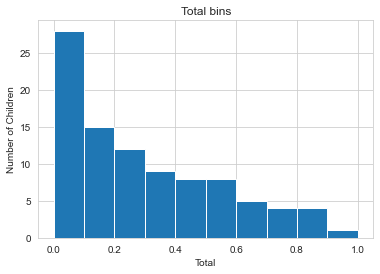

In [46]:
plt.hist(df_min_max_scaled['Total'])

# set x/y labels and plot title
plt.xlabel('Total')
plt.ylabel('Number of Children')
plt.title('Total bins').figure.savefig('Total_Histogram.png')

We want 3 bins of equal size, therefore we use Numpy's `linspace(start_value, end_value, numbers_generated)` function. 
<br><br>
In order to build 3 bins, we need to define 4 dividers or boundaries:

In [47]:
bins = np.linspace(min(df_min_max_scaled['Total']), max(df_min_max_scaled['Total']), 4)
bins

array([0.        , 0.33333333, 0.66666667, 1.        ])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

The bin group names is created as shown below:

In [48]:
group_names = ['Low', 'Medium', 'High']

In order to determine the value of ‘Total’ is belongs to which level: ‘Low’, ‘Medium’, or ‘High’, the pandas function `cut` is applied to the data. 

In [49]:
df_min_max_scaled['Total-binned'] = pd.cut(df_min_max_scaled['Total'], bins, labels=group_names, include_lowest=True )

In [50]:
df_min_max_scaled[['Total','Total-binned']].head(15)

,Total,Total-binned
0,0.594802,Medium
1,0.337464,Medium
2,0.297339,Low
3,0.149322,Low
4,0.052813,Low
5,0.013920,Low
6,0.016966,Low
7,0.000000,Low
8,0.049165,Low
9,0.079003,Low


In [51]:
df_min_max_scaled['Total-binned'].value_counts()

Low       59
Medium    25
High      10
Name: Total-binned, dtype: int64

Plotting the distribution of the bins:

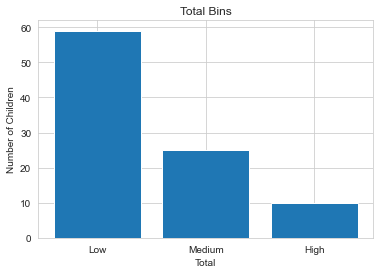

In [52]:
plt.bar(group_names, df_min_max_scaled['Total-binned'].value_counts())

# set x/y labels and plot title 
plt.xlabel('Total')
plt.ylabel('Number of Children')
plt.title('Total Bins').figure.savefig('Binned_Total_Histogram.png')

## Exploratory Data Analysis

In [53]:
df_cleaned = df_min_max_scaled.copy()

In [54]:
df_cleaned

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Total-binned
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019,Medium
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019,Medium
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019,Low
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019,Low
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019,High
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019,Medium
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019,Low
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019,Low


### Descriptive Question

**“What is the mean of the percentage of children who acquired foundational learning skills are from age 7 to 14?”**


In [55]:
df_cleaned['Total'].unique()

array([0.59480211, 0.33746447, 0.29733884, 0.14932174, 0.05281255,
       0.01392013, 0.01696592, 0.        , 0.04916508, 0.07900308,
       0.02628041, 0.0613843 , 0.10233371, 0.00127469, 0.095865  ,
       0.00414718, 0.14760852, 0.10122852, 0.0589104 , 0.04094385,
       0.25783733, 0.18791412, 0.06695199, 0.09070282, 0.14776384,
       0.08716702, 0.06627206, 0.05039741, 0.43038994, 0.26021728,
       0.35147016, 0.14232494, 0.70463373, 0.62586819, 0.4705136 ,
       0.36508159, 0.53291381, 0.15819981, 0.15269859, 0.00870904,
       0.2840384 , 0.08432335, 0.16061969, 0.0431432 , 0.77210111,
       0.56352979, 0.55051513, 0.35060715, 0.4763856 , 0.44780898,
       0.23900976, 0.23668374, 0.78502646, 0.49757613, 0.44341632,
       0.13839809, 0.30344008, 0.08392053, 0.46652061, 0.43484891,
       0.24157059, 0.21387929, 0.19074573, 0.14517942, 0.06825832,
       0.06441808, 0.64251426, 0.55776914, 0.31765184, 0.31463363,
       0.5702703 , 0.30206648, 0.27775963, 0.05051276, 0.88885

In [56]:
df_cleaned['Age group'].unique()

array(['Age 7 to 14', 'Grade 2/3'], dtype=object)

In [57]:
df_cleaned['Subject'].unique()

array(['Reading', 'Numeracy'], dtype=object)

In [58]:
df_cleaned.loc[df['Age group'] == 'Age 7 to 14'].groupby(['Age group', 'Subject'])['Total'].mean().to_frame('Mean of percentage of children who acquired foundational learning skills')

Mean of percentage of children who acquired foundational learning skills
Age group   Subject                                                                           
Age 7 to 14 Numeracy                                           0.323884                       
            Reading                                            0.474519

### Exploratory Question

**“What is the relationship between the wealth quintile and the percentage of children in the given age group who demonstrated foundational reading or numeracy skills?”**


In [59]:
df_cleaned[['Total', 'Wealth quintile-Poorest', 'Wealth quintile-Second', 'Wealth quintile-Middle', 'Wealth quintile-Fourth', 'Wealth quintile-Richest']]

,Total,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
0,0.594802,0.464655,0.488939,0.644270,0.682321,0.750140
1,0.337464,0.256991,0.280049,0.347804,0.388495,0.456616
2,0.297339,0.218173,0.202689,0.289658,0.358703,0.498521
3,0.149322,0.113977,0.116234,0.141038,0.157185,0.264095
4,0.052813,0.006390,0.033854,0.021514,0.050373,0.157210
...,...,...,...,...,...,...
93,0.855046,0.806833,0.757238,0.919847,0.891114,0.932783
96,0.540150,0.332770,0.381186,0.561429,0.708592,0.905390
97,0.297598,0.165873,0.237684,0.261230,0.393880,0.555034
98,0.235630,0.082500,0.115561,0.215509,0.346275,0.597658


**Data Visualization**

The correlation between two attributes, such as ‘Total’ and ‘Wealth quintile’ can be better visualized in a scatter plot of data points. 

(0.0, 1.0499999999999998)

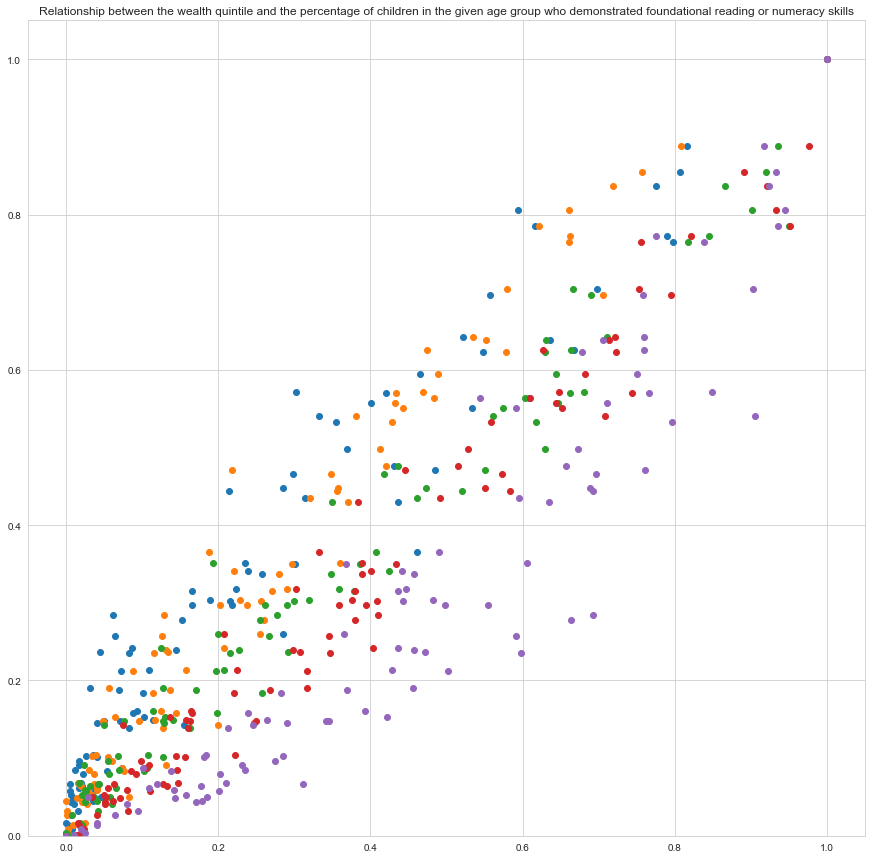

In [60]:
fig, axs = plt.subplots(figsize=(15,15), sharey=True)
plt.title('Relationship between the wealth quintile and the percentage of children in the given age group who demonstrated foundational reading or numeracy skills')
axs.scatter(df_cleaned['Wealth quintile-Poorest'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Second'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Middle'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Fourth'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Richest'],df_cleaned['Total']).figure.savefig('Wealth_Scatterplot.png')
plt.ylim(0,)

(0.0, 1.1739570330547884)

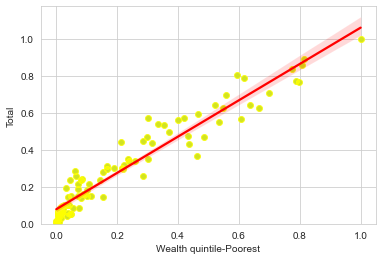

In [61]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Poorest'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Poorest'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "yellow"}, line_kws={"color": "red"}).figure.savefig('Poorest_Regplot.png')
plt.ylim(0,)

(0.0, 1.2312581026933673)

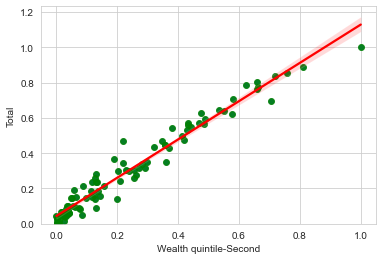

In [62]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Second'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Second'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "g"}, line_kws={"color": "red"}).figure.savefig('Second_Regplot.png')
plt.ylim(0,)

(0.0, 1.0499999999999998)

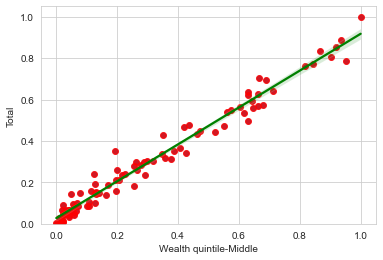

In [63]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Middle'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Middle'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "r"}, line_kws={"color": "green"}).figure.savefig('Middle_Regplot.png')
plt.ylim(0,)

(0.0, 1.0514517699211212)

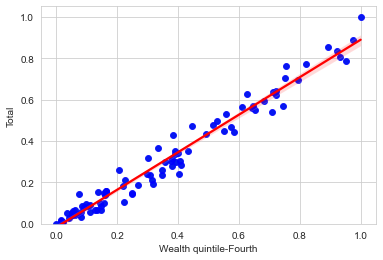

In [64]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Fourth'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Fourth'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "b"}, line_kws={"color": "red"}).figure.savefig('Fourth_Regplot.png')
plt.ylim(0,)

(0.0, 1.0555843873813986)

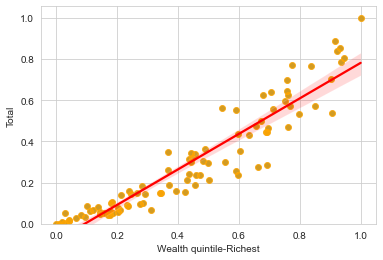

In [65]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Richest'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Richest'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "orange"}, line_kws={"color": "red"}).figure.savefig('Richest_Regplot.png')
plt.ylim(0,)

### Inferential Question

**“Based on the sample population of children who lived in Mongolia, the percentage of children who demonstrated foundational reading skills is higher than the percentage of children who demonstrated foundation numeracy skills. Will this hypothesis stand for the children who lived in Lesotho?”**

In [66]:
dfIQ = df_cleaned[['Countries and areas','Age group','Subject','Total']]
dfIQ

,Countries and areas,Age group,Subject,Total
0,Bangladesh,Age 7 to 14,Reading,0.594802
1,Bangladesh,Age 7 to 14,Numeracy,0.337464
2,Bangladesh,Grade 2/3,Reading,0.297339
3,Bangladesh,Grade 2/3,Numeracy,0.149322
4,Central African Republic,Age 7 to 14,Reading,0.052813
...,...,...,...,...
93,Turkmenistan,Age 7 to 14,Numeracy,0.855046
96,Zimbabwe,Age 7 to 14,Reading,0.540150
97,Zimbabwe,Age 7 to 14,Numeracy,0.297598
98,Zimbabwe,Grade 2/3,Reading,0.235630


**Data Visualization**

In [67]:
filter = dfIQ['Countries and areas'] == 'Mongolia'
dfMong = dfIQ[filter]
dfMong

,Countries and areas,Age group,Subject,Total
44,Mongolia,Age 7 to 14,Reading,0.772101
45,Mongolia,Age 7 to 14,Numeracy,0.563530
46,Mongolia,Grade 2/3,Reading,0.550515
47,Mongolia,Grade 2/3,Numeracy,0.350607


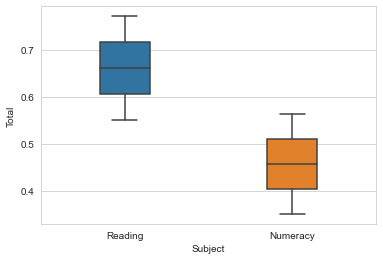

In [68]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=dfMong).figure.savefig('Mongolia_Subject_Boxplot.png')

In [69]:
filter = dfIQ['Countries and areas'] == 'Lesotho'
dfLeso = dfIQ[filter]
dfLeso

,Countries and areas,Age group,Subject,Total
36,Lesotho,Age 7 to 14,Reading,0.532914
37,Lesotho,Age 7 to 14,Numeracy,0.158200
38,Lesotho,Grade 2/3,Reading,0.152699
39,Lesotho,Grade 2/3,Numeracy,0.008709


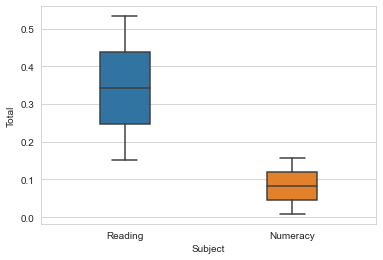

In [70]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=dfLeso).figure.savefig('Lesotho_Subject_Boxplot.png')

## Predictive Question

**“What is the predicted average percentage of children of Mongolia who acquired foundational learning skills in the year 2022?"**

### Data modeling

In [71]:
df_pred = df_merge.copy()

In [72]:
df_pred

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019,94.862427
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019,94.862427
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019,94.862427
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019,94.862427
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019,38.268650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000,2019,88.629192
90,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,2019,88.629192
91,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,2019,88.629192
92,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,2019,88.629192


In [73]:
df1 = df_pred.groupby(['Countries and areas']).mean()
df1

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Literacy_Total
Countries and areas,,,,,,,,,,,
Bangladesh,28.457650,29.936974,26.921090,26.679213,35.358958,20.048472,24.423636,27.957425,31.694423,41.750673,94.862427
Central African Republic,2.098010,1.903119,2.257982,1.235993,3.572731,0.274432,1.675630,1.446283,1.641818,5.060483,38.268650
Chad,4.787120,3.673869,5.796649,3.337531,10.998854,1.028218,2.092605,3.087163,5.168837,11.012239,88.629192
Democratic Republic of the Congo,4.538583,4.197713,4.839093,1.951247,7.877791,0.841633,2.178914,2.471255,5.541369,12.632685,88.629192
Gambia,7.490967,8.470875,6.290215,3.353714,9.795963,3.051757,4.936874,6.671892,9.002618,15.863188,88.629192
Ghana,12.674759,11.714040,13.613712,7.257946,20.007260,2.965855,9.244453,9.863954,15.696862,31.864600,92.490967
Guinea-Bissau,7.550170,6.811296,8.414608,5.329292,11.426943,3.616009,5.439116,5.593220,10.653504,12.506775,88.629192
Kiribati,24.498808,28.008585,21.276123,25.201998,23.782427,21.125338,26.591137,15.562242,21.064391,39.231844,88.629192
Kyrgyzstan,44.477615,47.493664,41.494103,40.868649,52.184168,43.984973,32.767901,44.911137,43.086610,61.754772,99.750000


In [74]:
df1.shape

(25, 11)

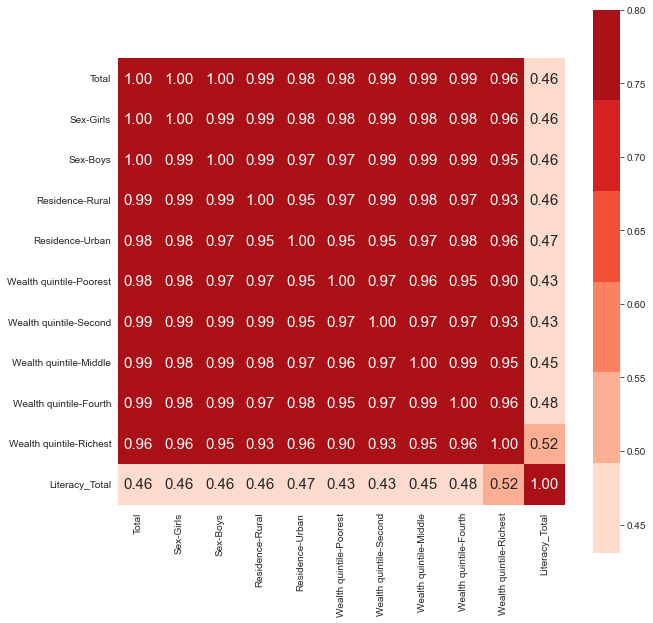

In [75]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap.png')

In [76]:
df1 = df1.reset_index()

### Split train-test dataset

In [77]:
X = df1[['Total']]
Y = df1[['Literacy_Total']]

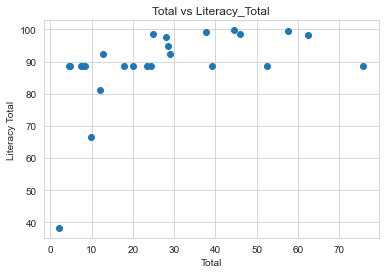

In [78]:
plt.plot(X,Y, linestyle='',marker='o')
plt.xlabel('Total')
plt.ylabel('Literacy Total')
plt.title('Total vs Literacy_Total').figure.savefig('Total_vs_Literacy.png')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Create Linear Regression model

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
lm.coef_

array([[0.28026504]])

In [82]:
lm.intercept_

array([81.18755437])

In [83]:
lm_y_test = lm.predict(X_test)
lm_y_train = lm.predict(X_train)

print('Train r2 score: ', r2_score(lm_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, lm_y_test)) 
print('Train MAE: ', mean_absolute_error(lm_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, lm_y_test))
print('Train MSE: ', mean_squared_error(lm_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, lm_y_test))

Train r2 score:  -3.660288056520913
Test r2 score:  0.3917083662423514
Train MAE:  7.152553217015968
Test MAE:  7.256409821517974
Train MSE:  131.0307153311166
Test MSE:  83.71201922752401


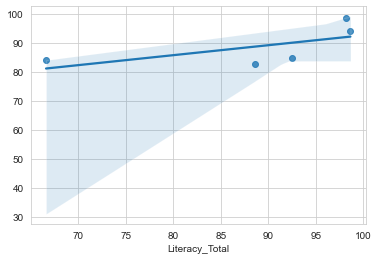

In [84]:
sns.regplot(y_test, lm_y_test, data=df1).figure.savefig('LR_Regplot.png')

### Create Decision Tree Regression model

In [85]:
dtr1 = DecisionTreeRegressor(max_depth=3)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [86]:
dtr_y_test = dtr1.predict(X_test)
dtr_y_train = dtr1.predict(X_train)

print('Train r2 score: ', r2_score(dtr_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, dtr_y_test)) 
print('Train MAE: ', mean_absolute_error(dtr_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, dtr_y_test))
print('Train MSE: ', mean_squared_error(dtr_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, dtr_y_test))

Train r2 score:  0.9286202624026584
Test r2 score:  0.23187957351466804
Train MAE:  2.3416746398925765
Test MAE:  6.620469079589839
Train MSE:  10.603040058719918
Test MSE:  105.7073751183834


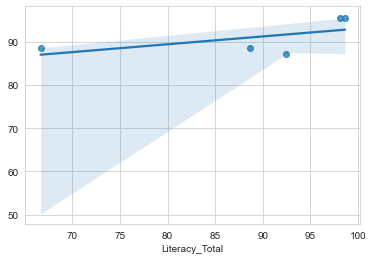

In [87]:
sns.regplot(y_test, dtr_y_test, data=df1).figure.savefig('DTR_Regplot.png')

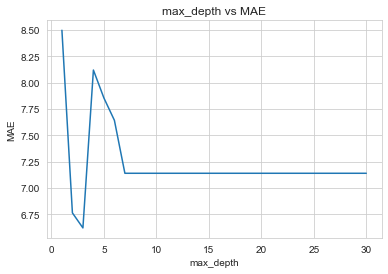

In [88]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE').figure.savefig('DTR.png')
plt.show()

### Create Neural Network Regression model

In [89]:
df_nn = df1.copy()

In [90]:
df_countries = df.copy()

In [91]:
df_countries = df_countries[['Countries and areas', 'Region', 'Sub-region', 'Development regions']]

In [92]:
df_countries = df_countries.drop_duplicates().reset_index()
df_countries.drop(columns=['index'], inplace = True)

In [93]:
df_nn = df_nn.merge(df_countries, how='left')
df_nn.head()

,Countries and areas,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Literacy_Total,Region,Sub-region,Development regions
0,Bangladesh,28.457650,29.936974,26.921090,26.679213,35.358958,20.048472,24.423636,27.957425,31.694423,41.750673,94.862427,SA,SA,Least Developed
1,Central African Republic,2.098010,1.903119,2.257982,1.235993,3.572731,0.274432,1.675630,1.446283,1.641818,5.060483,38.268650,SSA,WCA,Least Developed
2,Chad,4.787120,3.673869,5.796649,3.337531,10.998854,1.028218,2.092605,3.087163,5.168837,11.012239,88.629192,SSA,WCA,Least Developed
3,Democratic Republic of the Congo,4.538583,4.197713,4.839093,1.951247,7.877791,0.841633,2.178914,2.471255,5.541369,12.632685,88.629192,SSA,WCA,Least Developed
4,Gambia,7.490967,8.470875,6.290215,3.353714,9.795963,3.051757,4.936874,6.671892,9.002618,15.863188,88.629192,SSA,WCA,Least Developed


In [94]:
df_nn = df_nn[['Countries and areas', 'Region', 'Sub-region', 'Development regions', 'Total', 'Literacy_Total']]

In [95]:
sc_total = MinMaxScaler(feature_range = (0, 1))
sc_literacy = MinMaxScaler(feature_range = (0, 1))

sc_total = sc_total.fit(df1[['Total']])
sc_literacy = sc_literacy.fit(df1[['Literacy_Total']])

In [96]:
df_nn[['Total']] = sc_total.transform(df_nn[['Total']])
df_nn[['Literacy_Total']] = sc_literacy.transform(df_nn[['Literacy_Total']])
df_nn

,Countries and areas,Region,Sub-region,Development regions,Total,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,0.357167,0.920503
1,Central African Republic,SSA,WCA,Least Developed,0.000000,0.000000
2,Chad,SSA,WCA,Least Developed,0.036437,0.819119
3,Democratic Republic of the Congo,SSA,WCA,Least Developed,0.033069,0.819119
4,Gambia,SSA,WCA,Least Developed,0.073073,0.819119
5,Ghana,SSA,WCA,Less Developed,0.143313,0.881931
6,Guinea-Bissau,SSA,WCA,Least Developed,0.073876,0.819119
7,Kiribati,EAP,EAP,Least Developed,0.303526,0.819119
8,Kyrgyzstan,ECA,EECA,Less Developed,0.574234,1.000000
9,Lesotho,SSA,ESA,Least Developed,0.212007,0.819119


In [97]:
d = defaultdict(LabelEncoder)
col_list = [col for col in df_nn.columns.tolist() if df_nn[col].dtype.name == "object"]

df_nn[col_list] = df_nn[col_list].apply(lambda x: d[x.name].fit_transform(x))

In [98]:
X = df_nn.drop(columns=['Literacy_Total'])
y = df_nn['Literacy_Total'] 

In [99]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [153]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = xTrain.shape[1]
n_cols

5

In [154]:
#add model layers
model.add(Dense(250,  input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [155]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [156]:
#train model
history = model.fit(xTrain, yTrain, validation_split=0.2, epochs=200,  verbose=2)

Epoch 1/200
1/1 - 1s - loss: 0.3172 - val_loss: 0.0470 - 531ms/epoch - 531ms/step
Epoch 2/200
1/1 - 0s - loss: 0.0317 - val_loss: 0.0440 - 38ms/epoch - 38ms/step
Epoch 3/200
1/1 - 0s - loss: 0.0387 - val_loss: 0.0522 - 38ms/epoch - 38ms/step
Epoch 4/200
1/1 - 0s - loss: 0.0407 - val_loss: 0.0682 - 41ms/epoch - 41ms/step
Epoch 5/200
1/1 - 0s - loss: 0.0382 - val_loss: 0.0901 - 51ms/epoch - 51ms/step
Epoch 6/200
1/1 - 0s - loss: 0.0340 - val_loss: 0.1138 - 56ms/epoch - 56ms/step
Epoch 7/200
1/1 - 0s - loss: 0.0305 - val_loss: 0.1354 - 38ms/epoch - 38ms/step
Epoch 8/200
1/1 - 0s - loss: 0.0290 - val_loss: 0.1520 - 45ms/epoch - 45ms/step
Epoch 9/200
1/1 - 0s - loss: 0.0293 - val_loss: 0.1633 - 41ms/epoch - 41ms/step
Epoch 10/200
1/1 - 0s - loss: 0.0302 - val_loss: 0.1702 - 47ms/epoch - 47ms/step
Epoch 11/200
1/1 - 0s - loss: 0.0305 - val_loss: 0.1735 - 38ms/epoch - 38ms/step
Epoch 12/200
1/1 - 0s - loss: 0.0300 - val_loss: 0.1744 - 37ms/epoch - 37ms/step
Epoch 13/200
1/1 - 0s - loss: 0.029

Epoch 103/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.1995 - 48ms/epoch - 48ms/step
Epoch 104/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.1996 - 47ms/epoch - 47ms/step
Epoch 105/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.1996 - 46ms/epoch - 46ms/step
Epoch 106/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.1997 - 46ms/epoch - 46ms/step
Epoch 107/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.1997 - 42ms/epoch - 42ms/step
Epoch 108/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.1998 - 35ms/epoch - 35ms/step
Epoch 109/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.1999 - 35ms/epoch - 35ms/step
Epoch 110/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.2000 - 37ms/epoch - 37ms/step
Epoch 111/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.2000 - 39ms/epoch - 39ms/step
Epoch 112/200
1/1 - 0s - loss: 0.0255 - val_loss: 0.2001 - 41ms/epoch - 41ms/step
Epoch 113/200
1/1 - 0s - loss: 0.0254 - val_loss: 0.2002 - 37ms/epoch - 37ms/step
Epoch 114/200
1/1 - 0s - loss: 0.0254 - val_loss: 0.2003 - 38ms/epoch - 38ms/step
Epoch 115/200
1/

In [157]:
nn_y_test = model.predict(xTest)
nn_y_train = model.predict(xTrain)

In [158]:
print('Train r2 score: ', r2_score(yTrain, nn_y_train))
print('Test r2 score: ', r2_score(yTest, nn_y_test)) 
print('Train MAE: ', mean_absolute_error(yTrain, nn_y_train))
print('Test MAE: ',mean_absolute_error(yTest, nn_y_test))
print('Train MSE: ', mean_squared_error(yTrain, nn_y_train))
print('Test MSE: ',mean_squared_error(yTest, nn_y_test))

Train r2 score:  -0.44453832221361766
Test r2 score:  -2.082029704072143
Train MAE:  0.16041702627700236
Test MAE:  0.2378379420246915
Train MSE:  0.060819264235527824
Test MSE:  0.11220856412483035


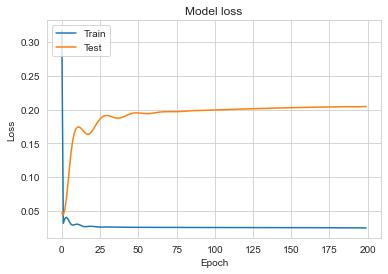

In [159]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left').figure.savefig('NN.png')
plt.show()

### Regression models prediction

In [160]:
dtr1.predict([[50]])

array([95.49667694])

In [161]:
lm.predict([[50]])

array([[95.20080623]])

In [162]:
df_pred = df_nn.copy()

In [163]:
real_X = df_pred.drop(columns=['Literacy_Total'])

In [164]:
real_X = real_X.assign(Total=50)

In [165]:
real_X[['Total']] = sc_total.transform(real_X[['Total']])

In [166]:
sc_literacy.inverse_transform([[model.predict(real_X).mean()]])

array([[92.64769275]])

## Causal Question

**“Will an increase in the age of children increase the percentage of children who demonstrated foundational reading or numeracy skills?”**

In [114]:
df2 = df.copy()

In [115]:
df2 = df2.groupby(['Age group']).mean().Total.to_frame().reset_index()
df2

,Age group,Total
0,Age 7 to 14,32.891776
1,Grade 2/3,16.083508


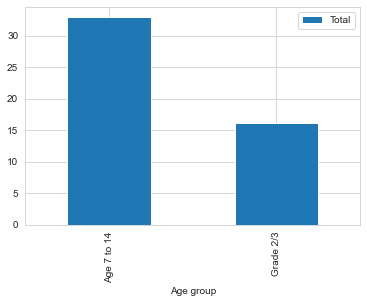

In [116]:
df2.plot.bar(x='Age group', y='Total').figure.savefig('Causal.png')

In [117]:
df2.iloc[0].Total

32.89177642941475

For grade 2/3, the age is around 7 to 9, so we take the total of age 7 to 14 minus with grade 2/3 to get the total percentage of age 9 to 14

In [118]:
new_row = pd.DataFrame({'Age group':['Age 9 to 14'], 'Total': [df2.iloc[0].Total - df2.iloc[1].Total]})
df2 = pd.concat([df2, new_row], ignore_index = True, axis = 0)
df2

,Age group,Total
0,Age 7 to 14,32.891776
1,Grade 2/3,16.083508
2,Age 9 to 14,16.808268


In [119]:
df2.drop(df2.loc[df2['Age group']=='Age 7 to 14'].index, inplace=True)

In [120]:
df2.loc[1,['Age group']] = 'Age 7 to 9'

In [121]:
df2

,Age group,Total
1,Age 7 to 9,16.083508
2,Age 9 to 14,16.808268


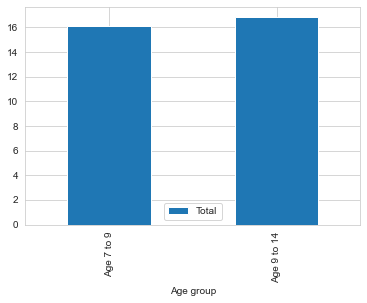

In [122]:
df2.plot.bar(x='Age group', y='Total').figure.savefig('Causal1.png')